#**GDG TASK 2**

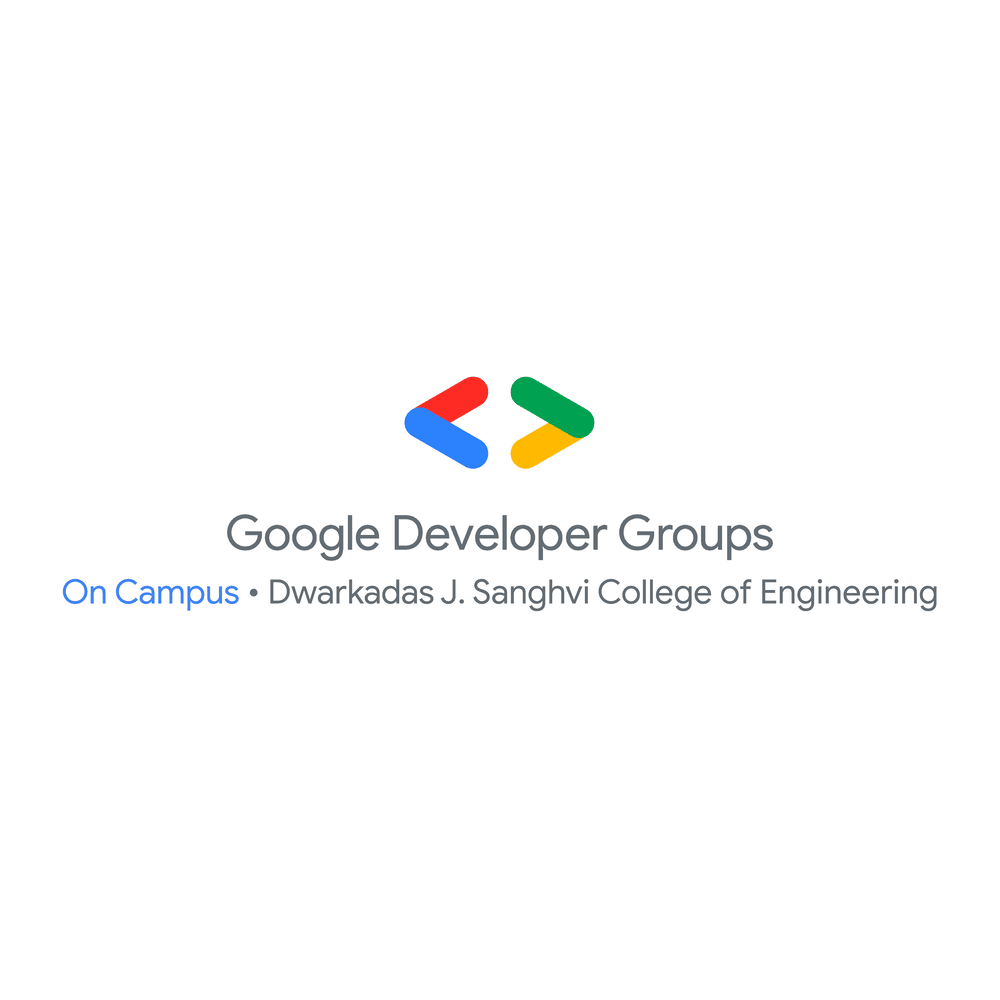

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [1]:
!pip install shap -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [31]:
# read dataset
df_crab = pd.read_csv('/content/drive/MyDrive/Documents/Task1.csv')

In [45]:
df_crab.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1.247378,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0.170097,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1.219029,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,4.316891,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0.850485,False,True,False


Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [33]:
df_crab = df_crab.drop('id', axis=1)

In [34]:
df_crab = df_crab[df_crab['Height']!=0]

In [35]:
df_crab['LostWeight'] = df_crab['Weight']- (df_crab['Shucked Weight'] + df_crab['Viscera Weight'] + df_crab['Shell Weight'])

In [36]:
df_crab['LostWeight'] = df_crab['LostWeight'].where(df_crab['LostWeight'] > 0, 0)

In [37]:
df_crab = pd.get_dummies(df_crab, columns=['Sex'])

If all is correct, this should be the shape of your df now.

In [38]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

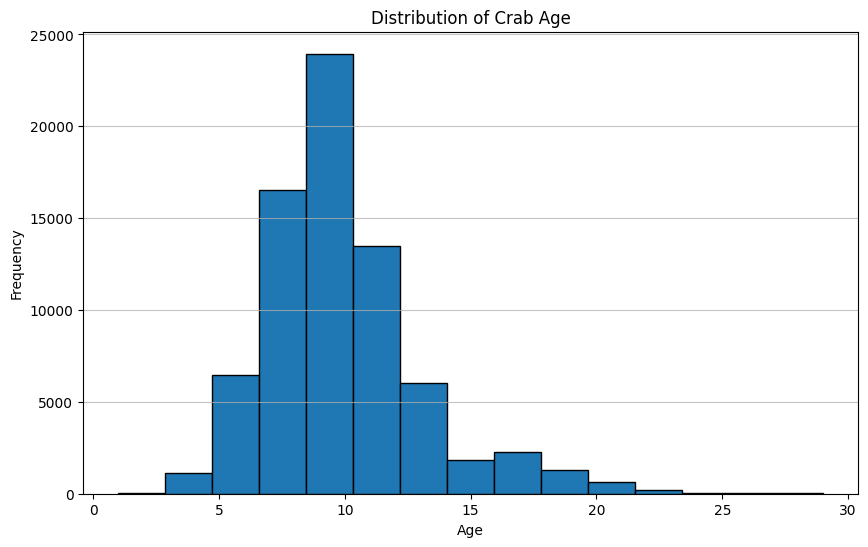

In [43]:
# Your code starts here
plt.figure(figsize=(10, 6))
plt.hist(df_crab['Age'], bins=15, edgecolor='black') # You can change the number of bins
plt.title('Distribution of Crab Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [39]:
# Your code starts here
X = df_crab.drop('Age', axis=1)
y = df_crab['Age']
# Your code ends here

In [40]:
y.isnull().sum()

np.int64(0)

In [46]:
# This code should print (74003, 11) and (74003, 1) if everything is correct
X.shape, y.shape

((74027, 11), (74027,))

In [47]:
#Print a few records of X
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.247378,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.170097,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1.219029,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,4.316891,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.850485,False,True,False


In [48]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [49]:
# Import train_test_split Hint: Use sklearn.model_selectio
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [52]:
# Your code starts here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [54]:
# Your code starts here

X_train.shape,X_test.shape

# Your code ends here

((51818, 11), (22209, 11))

Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [55]:
# Add your import statement here

from sklearn.svm import  SVR
# Create an SVR object 'svr' by calling SVR()
svr = SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [56]:
svr.fit(X_train,y_train)

SVR()

In [ ]:
# Your code starts here

# Your code ends here

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22201,) if everything is correct.

In [57]:
# Your code starts here
predictions = svr.predict(X_test)
# Your code ends here

Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

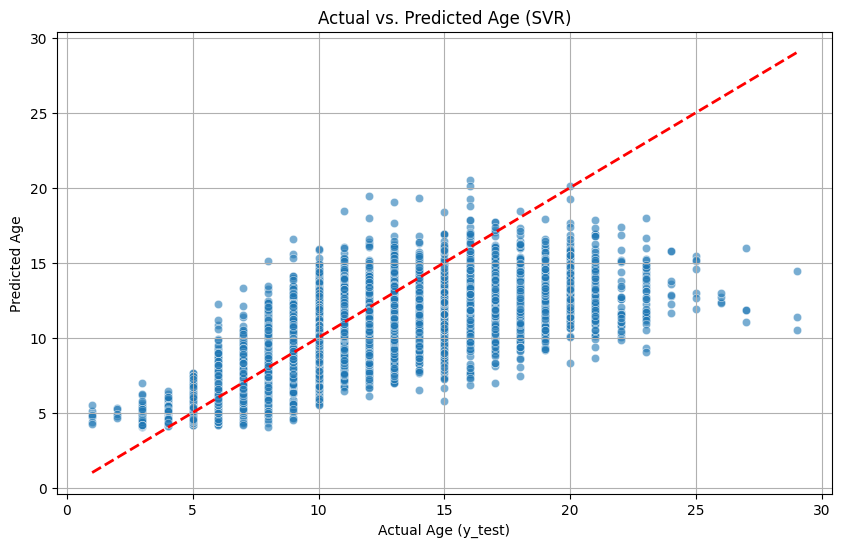

In [58]:
# Your code starts here
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45 degree line
plt.title('Actual vs. Predicted Age (SVR)')
plt.xlabel('Actual Age (y_test)')
plt.ylabel('Predicted Age')
plt.grid(True)
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [67]:
# Your code starts here
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error

print(f"{r2_score(y_test, predictions):.3f}")
# Your code ends here

0.552


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

An R² score of 0.54 means the model explains 54% of the variance in the target variable, leaving 46% unexplained. This indicates moderate performance—better than random guessing but far from ideal.




In [ ]:
#Explore additional metrics here

# Mean Absolute Error

In [64]:
# Calculate MSE
mean_squared_error(y_test, predictions)

4.40304507168248

In [65]:

# Calculate RMSE
root_mean_squared_error(y_test, predictions)

2.0983434112848354

You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

**1. XGBoost Regressor**

**How it works**: XGBoost is an ensemble method based on decision trees. It builds trees sequentially, where each tree corrects the errors of the previous ones, and uses gradient descent to minimize errors efficiently.

    Best scenario: XGBoost is great when the data doesn't have linearity and the features are dependent on each other. At such times the XGboost's boosting method, which looks for the flaws of previous trees and makes a new one comes best.


**2. Random Forest Regressor**

**How it works**: An ensemble method that constructs multiple decision trees during training. It combines their outputs averages them to improve prediction accuracy and control overfitting.

    Best scenario: Random Forest is best used when the data is not linear, but the relationship in each features is weak. The randomforest generates all trees almost pararelly


**3. Ridge Regressor**

**How it works**: A type of linear regression that adds an L2 regularization term to the cost function, penalizing large coefficients to prevent overfitting.

    Best scenario: Best used when a high dimensional data which is linear in nature. The ridge uses L2 regularization so that data doesn't overfit.

###Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [61]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

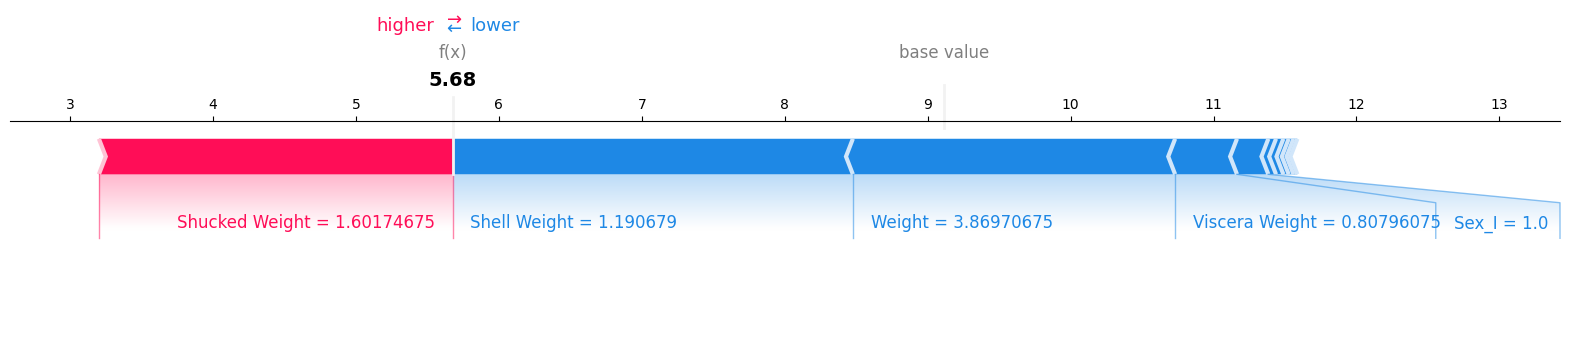

In [68]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1LlLZM-DCdajm9-EakRLM7qJSYQghJZUW/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [69]:
df = pd.read_csv('/content/drive/MyDrive/Task2.csv',index_col=0)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [71]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [72]:
#describe()
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

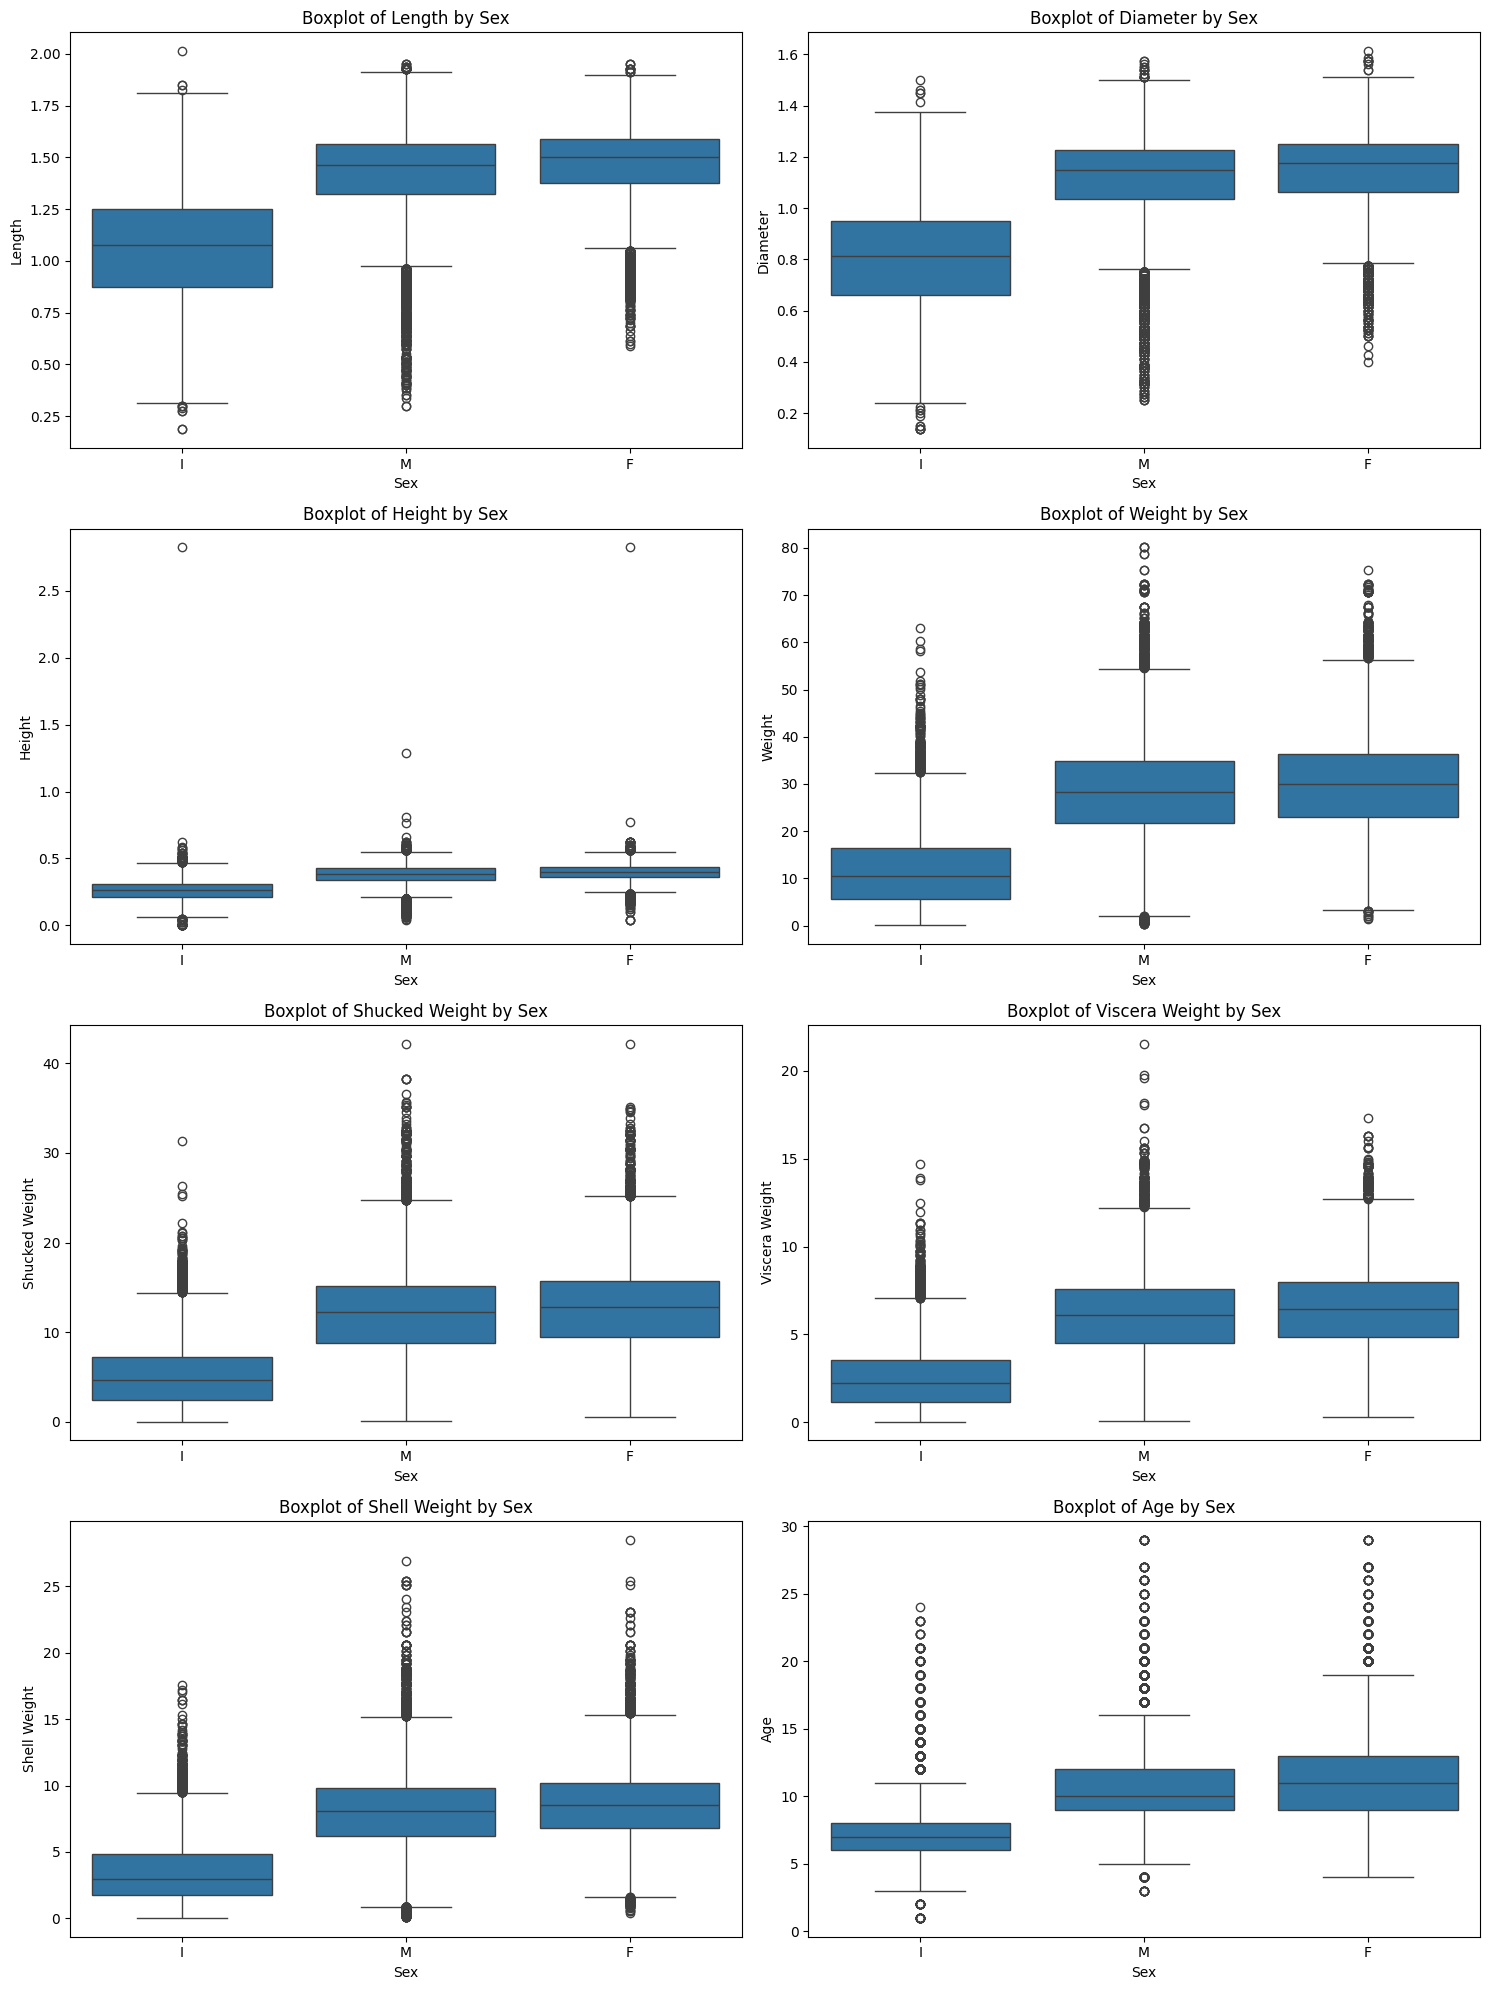

In [73]:
# your code starts here

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i + 1)
    sns.boxplot(x='Sex', y=column, data=df)
    plt.title(f'Boxplot of {column} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(column)
plt.tight_layout()
plt.show()
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [75]:
# your code starts here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [76]:
# your code starts here
# Get numerical columns to scale (excluding 'Sex' which is object type)
features_to_scale = df.select_dtypes(include=np.number).columns

# Fit and transform the selected numerical features
scaled_features = scaler.fit_transform(df[features_to_scale])
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [77]:
# your code starts here
# Convert the scaled features back to a DataFrame
df_feat = pd.DataFrame(scaled_features, columns=features_to_scale, index=df.index)

# Now, let's re-add the 'Sex' column to df_feat if it was not numerical
# We'll need to encode 'Sex' separately, or keep it as is if it's going to be one-hot encoded later.
# For now, let's keep it consistent with the overall flow where 'Sex' was directly used in boxplots.
# If 'Sex' needs to be included in df_feat, it needs to be handled (e.g., one-hot encoded) before scaling numericals.
# Given the current prompt, we are only scaling numericals and excluding 'Sex'.

# Let's verify the head of df_feat
display(df_feat.head())
# your code ends here

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,-0.304805
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,-0.619749
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.304805
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,-0.619749


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [78]:
# Your code starts here.
X = df_feat
y = df['Sex'] # Assuming 'Sex' is the target for classification based on boxplots.
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [79]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [80]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [81]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [82]:
# Your code starts here.
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, pred))
# Your code ends here

              precision    recall  f1-score   support

           F       0.42      0.42      0.42      6820
           I       0.71      0.71      0.71      7222
           M       0.46      0.46      0.46      8174

    accuracy                           0.53     22216
   macro avg       0.53      0.53      0.53     22216
weighted avg       0.53      0.53      0.53     22216



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [83]:
# Your code starts here.
print(f"{np.mean(pred == y_test):.3f}")
# Your code ends here

0.530


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [84]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

accuracies = []

# Your code starts here.
for i in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracies.append(np.mean(pred_i == y_test))
# Your code ends here

**Plot a graph of K value vs Accuracy**

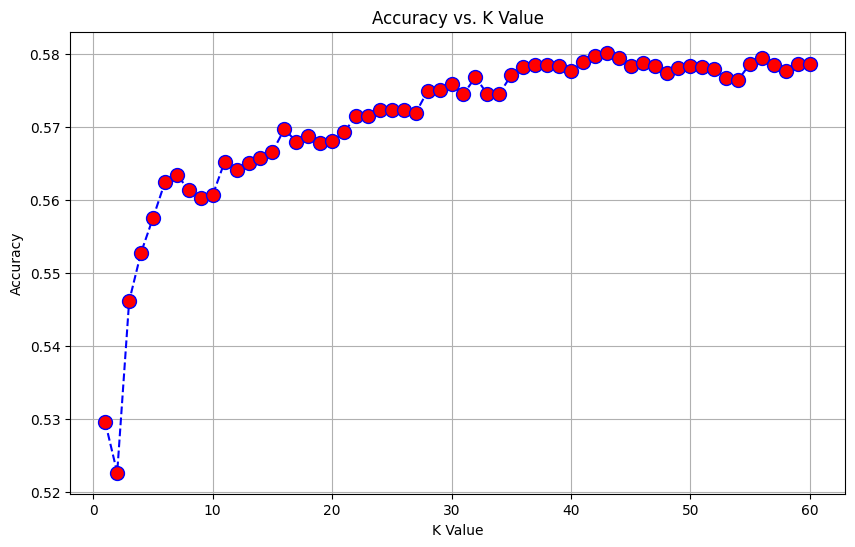

In [85]:
# Your code starts here.
plt.figure(figsize=(10,6))
plt.plot(range(1,61), accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [86]:
# Your code starts here.
best_k = np.argmax(accuracies) + 1
best_accuracy = np.max(accuracies)

print(f"The best K value is: {best_k}")
print(f"The highest accuracy achieved is: {best_accuracy:.3f}")
# Your code ends here.

The best K value is: 43
The highest accuracy achieved is: 0.580


# Reasons:
 The best K value is chosen by finding the point on the 'Accuracy vs. K Value' plot where the accuracy score is maximized.#
  This K value represents the optimal balance between bias and variance for this specific dataset and model, minimizing misclassifications.
 Visually, it's the peak of the plotted line, indicating that increasing or decreasing K from this point would likely lead to lower accuracy.

# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)

# **End of Task**


